# TP2 de Statistique Serigne Dame GADIAGA MAM3 23|24

In [1]:
comparaison_des_intervals <- function(sample, alpha) {
  n <- length(sample)
  x_bar <- mean(sample)
  s <- sd(sample)
  t_alpha_student <- qt(1 - alpha/2, df = n - 1)
  z_alpha_sur_2 <- qnorm(1 - alpha/2)
  max_x<-max(sample)
  # I1
  I1 <- c(x_bar - t_alpha_student * s / sqrt(n), x_bar + t_alpha_student * s / sqrt(n))
  #  I2
  I2 <- c(x_bar - z_alpha_sur_2 * x_bar / sqrt(n), x_bar + z_alpha_sur_2 * x_bar / sqrt(n))
  # I3
  I3 <- c(exp(log(x_bar) - z_alpha_sur_2 / sqrt(n)), exp(log(x_bar) + z_alpha_sur_2 / sqrt(n)))
  # I4
  I4 <- c(max_x/-log(1 - (1 - alpha/2)^(1/n)),max_x/-log(1 - (alpha/2)^(1/n)))
  # I5
  I5 <- c(sqrt(n) * x_bar /(z_alpha_sur_2+sqrt(n)), sqrt(n) * x_bar /(-z_alpha_sur_2+sqrt(n)))
  intervals <- matrix(c(I1, I2, I3, I4, I5), ncol = 2, byrow = TRUE)
  colnames(intervals) <- c("Borne inf", "Borne sup")
  rownames(intervals) <- c("I1", "I2", "I3", "I4", "I5")
  return(intervals)
}
echantillon<-rexp(50,rate=0.5)
resultat<-comparaison_des_intervals(echantillon,0.05)
resultat

,Borne inf,Borne sup
I1,1.504434,2.693595
I2,1.517208,2.680821
I3,1.590880,2.769450
I4,1.199302,3.442938
I5,1.643475,2.903927


In [5]:
couverture <- function(n, nrep, u, alpha) {
  couv <- numeric(5)
  long <- 0
  for (i in 1:nrep) {
    my_sample <- rexp(n, rate = 0.5)
    intervals <- comparaison_des_intervals(my_sample, alpha)
    u_real_verification <- u >= intervals[, 1] & u <= intervals[, 2]
    couv <- couv + u_real_verification
    long <- long + apply(intervals, 1, function(x) x[2] - x[1])
  }
  couv <- couv / nrep * 100
  long <- long / nrep
  return(list(couv = couv, long = long))
}

u <- 1/0.5
alpha <- 0.05
resultat <- couverture(100, 50, u, alpha)
resultat


$couv
I1 I2 I3 I4 I5 
88 88 88 94 88 

$long
       I1        I2        I3        I4        I5 
0.7812480 0.7819603 0.7869764 1.8683996 0.8131990

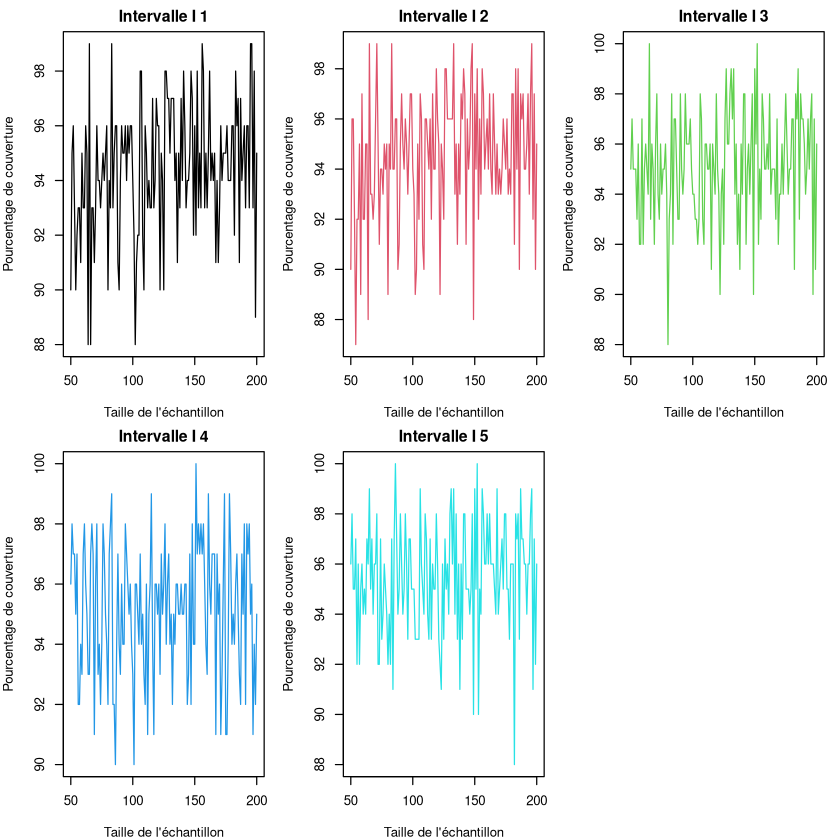

In [8]:

draw_couverture <- function(n_max, u, alpha) {
  couv_mat <- matrix(0, nrow = 5, ncol = n_max - 49)
  for (n in 10:n_max) {
    couv <- numeric(5)
    for (i in 1:100) {
      my_sample <- rexp(n, rate = 0.5) 
      intervals <- comparaison_des_intervals(my_sample, alpha)
      u_real_verification <- u >= intervals[, 1] & u <= intervals[, 2]
      couv <- couv + u_real_verification
    }
    couv <- couv / 100 * 100 
    couv_mat[, n - 49] <- couv
  }
  par(mfrow = c(2, 3), mar = c(4, 4, 2, 1))
  for (i in 1:5) {
    plot(50:n_max, couv_mat[i, ], type = 'l', col = i, xlab = "Taille de l'échantillon", ylab = "Pourcentage de couverture", main = paste("Intervalle I", i))
  }
  par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)
}
draw_couverture(200, 2, 0.05)

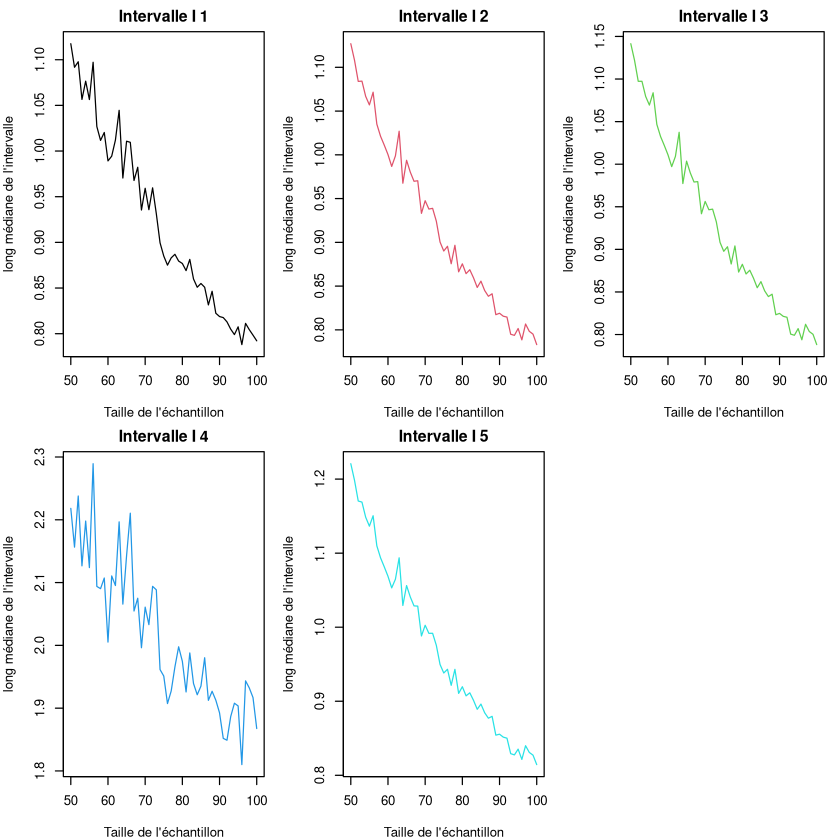

In [9]:
draw_long <- function(n_max, u, alpha) {
  long_mat <- matrix(0, nrow = 5, ncol = n_max - 49)
  for (n in 50:n_max) {
    long <- numeric(5)
    for (i in 1:100) {
      my_sample <- rexp(n, rate = 0.5) 
      intervals <- comparaison_des_intervals(my_sample, alpha)
      long <- long + apply(intervals, 1, function(x) x[2] - x[1])
    }
    long <- long / 100 
    long_mat[, n - 49] <- long
  }
  par(mfrow = c(2, 3), mar = c(4, 4, 2, 1))
  for (i in 1:5) {
    plot(50:n_max, long_mat[i, ], type = 'l', col = i, xlab = "Taille de l'échantillon", ylab = "long médiane de l'intervalle", main = paste("Intervalle I", i))
  }
  par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)
}
draw_long(100, 2, 0.05)